This notebook contains an analysis of the land use attribute in the property assessment dataset

the earliest data is from 2004 and the latest data is from 2024

the data is in 5 year intervals. note, there was no data availible for 2014, so data from 2015 was chosen, as it had more data points than 2013

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_53116/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [40]:
# grab required data

pa_2004 = pd.read_csv('../data/property_assessment_2004.csv')[['PID', 'LU']]
pa_2009 = pd.read_csv('../data/property_assessment_2009.csv')[['PID', 'LU']]
pa_2015 = pd.read_csv('../data/property_assessment_2015.csv')[['PID', 'LU']]
pa_2019 = pd.read_csv('../data/property_assessment_2019.csv')[['PID', 'LU']]
pa_2024 = pd.read_csv('../data/property_assessment_2024.csv')[['PID', 'LU']]

/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_53116/2767882949.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2004 = pd.read_csv('../data/property_assessment_2004.csv')[['PID', 'LU']]
/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_53116/2767882949.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2009 = pd.read_csv('../data/property_assessment_2009.csv')[['PID', 'LU']]
/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_53116/2767882949.py:6: DtypeWarning: Columns (16,61) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2019 = pd.read_csv('../data/property_assessment_2019.csv')[['PID', 'LU']]
/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_53116/2767882949.py:7: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2024 = pd.read_csv('../

Text(0.5, 0, 'Land Usage Type')

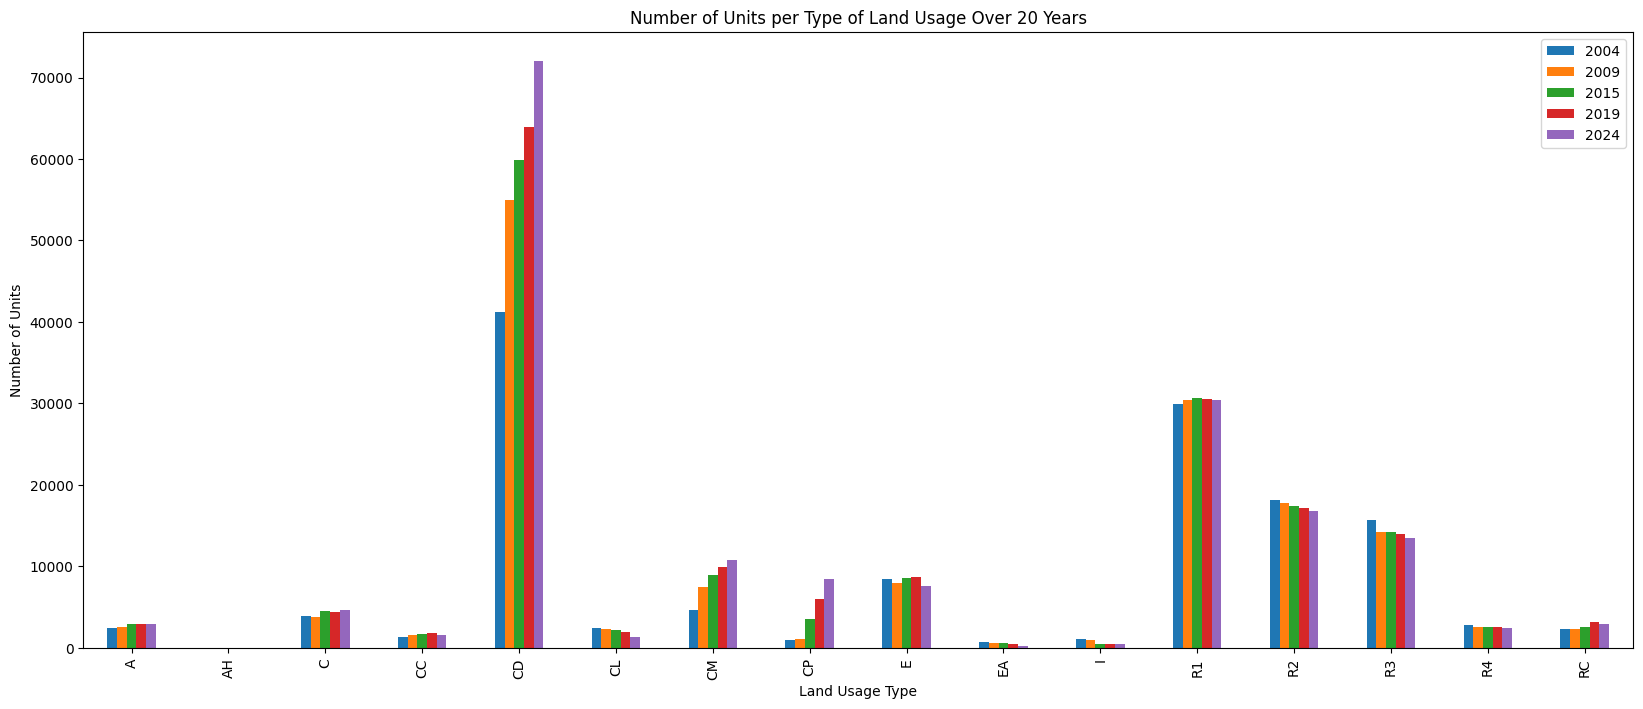

In [66]:
# fig, axes = plt.subplots(figsize=(20,6), layout='constrained')

group_04 = pa_2004.groupby('LU').count().rename(columns={'PID': '2004'})
group_09 = pa_2009.groupby('LU').count().rename(columns={'PID': '2009'})
group_15 = pa_2015.groupby('LU').count().rename(columns={'PID': '2015'})
group_19 = pa_2019.groupby('LU').count().rename(columns={'PID': '2019'})
group_24 = pa_2024.groupby('LU').count().rename(columns={'PID': '2024'})

bar_graph = pd.merge(group_04, group_09, on='LU')
bar_graph = pd.merge(bar_graph, group_15, on='LU')
bar_graph = pd.merge(bar_graph, group_19, on='LU')
bar_graph = pd.merge(bar_graph, group_24, on='LU')

bar_graph.plot(kind='bar', figsize=(20,8))
plt.title('Number of Units per Type of Land Usage Over 20 Years')
plt.ylabel('Number of Units')
plt.xlabel('Land Usage Type')


Text(0.5, 0, 'Land Usage Type')

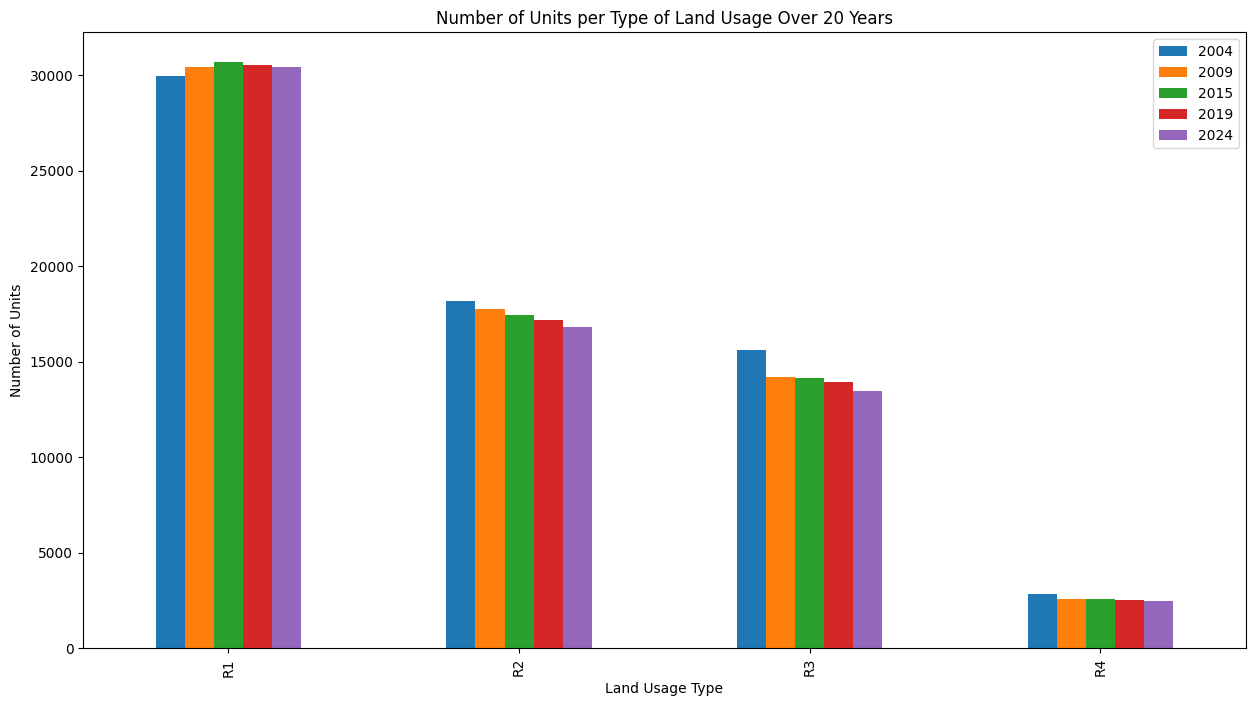

In [101]:
group_04 = pa_2004.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2004'})
group_09 = pa_2009.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2009'})
group_15 = pa_2015.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2015'})
group_19 = pa_2019.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2019'})
group_24 = pa_2024.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2024'})

bar_graph = pd.merge(group_04, group_09, on='LU')
bar_graph = pd.merge(bar_graph, group_15, on='LU')
bar_graph = pd.merge(bar_graph, group_19, on='LU')
bar_graph = pd.merge(bar_graph, group_24, on='LU')

bar_graph.plot(kind='bar', figsize=(15,8))
plt.title('Number of Multifamily Units Over 20 Years')
plt.ylabel('Number of Units')
plt.xlabel('Number of Families per Home')
